<a href="https://colab.research.google.com/github/YangTaeSung/CAU-MachineLearning/blob/master/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [0]:
import pandas as pd
df = pd.read_csv("data_train.csv", names = ['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
0,0.273548,-8.932102,18.708684,73.578825
1,5.403327,4.782977,-18.762210,-56.410433
2,0.029941,-3.245916,6.932498,52.390768
3,3.047974,0.715211,-1.965419,-6.936295
4,1.302074,-5.871807,-15.702181,-34.997017


* Training data reading

In [0]:
X = df[['A','B','C']]
h = df['D']

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
transformer.fit(X)
X = transformer.transform(X)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

x = X[:, 0] 
y = X[:, 1]
z = X[:, 2]

* Feature scaling & Distributing value to array to Training data

In [0]:
df2 = pd.read_csv("data_test.csv", names = ['A', 'B', 'C', 'D'])
df2.head()

,A,B,C,D
0,-1.788894,-2.717927,-4.425695,-14.055818
1,2.958174,4.515505,6.644435,20.504905
2,-0.569490,10.096246,-13.270292,-73.843148
3,4.279318,2.747878,-5.857125,-24.644937
4,0.125975,-4.349421,5.777460,31.934657


* Testing data reading

In [0]:
XTesting = df2[['A','B','C']]
hTesting = df2['D']

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
transformer.fit(XTesting)
XTesting = transformer.transform(XTesting)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTesting = sc.fit_transform(XTesting)

xTesting = XTesting[:, 0] 
yTesting = XTesting[:, 1]
zTesting = XTesting[:, 2]

* Feature scaling & Distributing value to array to Testing data

In [0]:
thetaZero = 0.0
thetaOne = 0.0
thetaTwo = 0.0
thetaThree = 0.0

cycle = 4000
learningLate = 1.1

* Initialize Theta value
* Set Optimization cycle & Learning late 

In [0]:
iForGraph = []
jForGraph = []
jTestingForGraph = []
newThetaOne = []
newThetaZero = []
newThetaTwo = []
newThetaThree = []

noiseNum = len(x)
print(noiseNum)

300


* Define variables to Plotting

In [0]:
for i in range(cycle):

  f = thetaZero + thetaOne * x + thetaTwo * y + thetaThree * z
  fTesting = thetaZero + thetaOne * xTesting + thetaTwo * yTesting + thetaThree * zTesting
  j = np.sum((f - h) ** 2) / (2 * noiseNum)
  jTesting = np.sum((fTesting - hTesting) ** 2) / (2 * noiseNum)

  # Optimization은 Training data로 진행
  thetaZero = thetaZero - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero))
  thetaOne = thetaOne - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero)*x)
  thetaTwo = thetaTwo - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero)*y)
  thetaThree = thetaThree - learningLate / noiseNum * np.sum((thetaOne*x + thetaTwo*y + thetaThree*z - h + thetaZero)*z)
  
  # Loss를 표현한 그래프의 범위가 너무 커서 Loss의 변이가 명확히 확인되지 않아 첫번째 사이클은 그래프에서 제외시켰습니다. 
  if i > 0:
      jTestingForGraph.append(jTesting)
      iForGraph.append(i)
      jForGraph.append(j)
  
  if i == 3999:
      jTestingForGraph.append(jTesting)
      iForGraph.append(i)
      jForGraph.append(j)
  
  newThetaZero.append(thetaZero)
  newThetaOne.append(thetaOne)
  newThetaTwo.append(thetaTwo)
  newThetaThree.append(thetaThree)
  
  if i % 200 == 0:
        print('cycle : {:10d} cost: {:10f} thetaZero: {:10f} thetaOne: {:10f} thetaTwo: {:10f} thetaThree: {:10f}'.format(i, j, thetaZero, thetaOne, thetaTwo, thetaThree))

finalY = thetaZero + thetaOne * x + thetaTwo * y + thetaThree * z

cycle :          0 cost: 135990.528423 thetaZero: 495.376232 thetaOne: 284.767898 thetaTwo: -28.705472 thetaThree:   9.069348
cycle :        200 cost: 115.070616 thetaZero: 450.342029 thetaOne:  -1.780748 thetaTwo: -94.555351 thetaThree: 357.669265
cycle :        400 cost: 104.502971 thetaZero: 450.342029 thetaOne:  48.131212 thetaTwo: -140.944769 thetaThree: 354.111654
cycle :        600 cost: 103.504306 thetaZero: 450.342029 thetaOne:  64.321404 thetaTwo: -152.034185 thetaThree: 349.043967
cycle :        800 cost: 103.455903 thetaZero: 450.342029 thetaOne:  67.870671 thetaTwo: -154.319733 thetaThree: 347.789137
cycle :       1000 cost: 103.453929 thetaZero: 450.342029 thetaOne:  68.586168 thetaTwo: -154.772561 thetaThree: 347.528349
cycle :       1200 cost: 103.453853 thetaZero: 450.342029 thetaOne:  68.727000 thetaTwo: -154.861224 thetaThree: 347.476555
cycle :       1400 cost: 103.453850 thetaZero: 450.342029 thetaOne:  68.754519 thetaTwo: -154.878521 thetaThree: 347.466406
cycle :

* Gradient descent algorithm(multiple linear regression)
* Output result for 100cycle
* Output the optimal linear function - finalY 

## 1. Plotting the estimated parameters

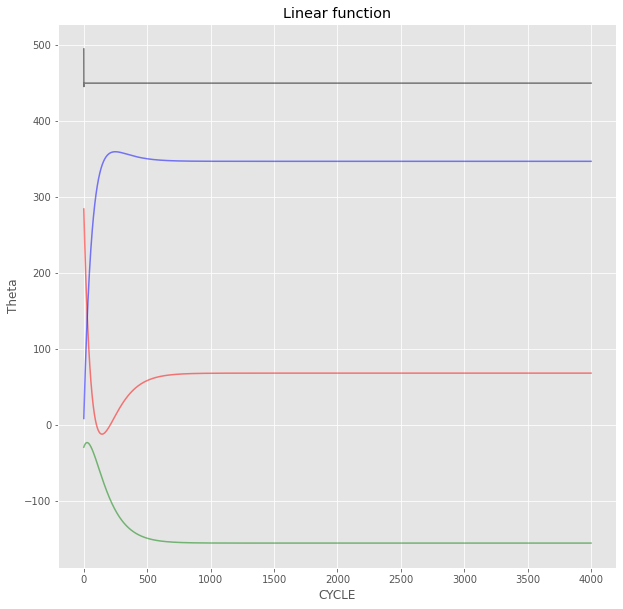

In [0]:
plt.figure(figsize=(10, 10)) # 그래프 사이즈 조절
plt.title('PARAMETERS GRAPH')
plt.xlabel('CYCLE')
plt.ylabel('Theta')
plt.plot(iForGraph, newThetaZero, c = 'black', alpha = 0.5)
plt.plot(iForGraph, newThetaOne, c = 'red', alpha = 0.5)
plt.plot(iForGraph, newThetaTwo, c = 'green', alpha = 0.5)
plt.plot(iForGraph, newThetaThree, c = 'blue', alpha = 0.5)
plt.show()

## 2. Plotting the training error

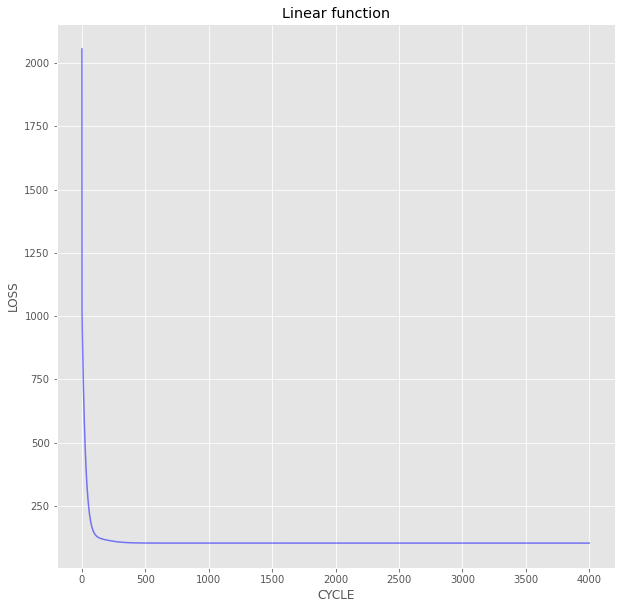

In [0]:
plt.figure(figsize=(10, 10)) # 그래프 사이즈 조절
plt.title('LOSS FUNCTION - TRAINING DATA')
plt.xlabel('CYCLE')
plt.ylabel('LOSS')
plt.plot(iForGraph, jForGraph, c = 'blue', alpha = 0.5)
plt.show()

## 3. Plotting the testing error

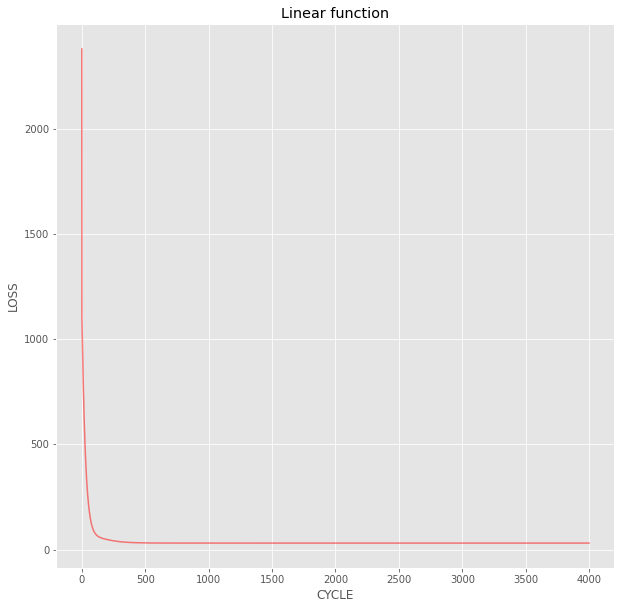

In [0]:
plt.figure(figsize=(10, 10)) # 그래프 사이즈 조절
plt.title('LOSS FUNCTION - TESTING DATA')
plt.xlabel('CYCLE')
plt.ylabel('LOSS')
plt.plot(iForGraph, jTestingForGraph, c = 'red', alpha = 0.5)
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

pdf파일 짤림방지용 공백